# Personal Loan Campaign Modelling Project
## By: Jacob Siegel

Workflow to evaluate Personal Loan Prediction models.


Note: Functions for: Confusion matrix, ROC plotting and Feature Importance are from class example notebook 

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#Import sklearn features
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

#Import Statsmodel features
import statsmodels.api as sm

#Stop Warmings
import warnings
warnings.filterwarnings("ignore")

## 1. Data Loading and Pre-Processing (data cleanup) 

In [2]:
#Load Data 
Data = pd.read_csv('Loan_Modelling.csv')
raw = Data.copy()

In [3]:
Data.shape

(5000, 14)

In [4]:
Data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
#remove the ID column as it is not needed for the analysis
Data = Data.drop(['ID'],  axis=1)

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


Many of the categorical variables are not marked as categorical (e.g. Oneline, etc.)
This will be adressed during model building

In [7]:
#Check for missing values
pd.DataFrame(Data.isnull().sum(), columns= ['# of missing values'])

,# of missing values
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0
Securities_Account,0


No missing values in the data set. 

In [8]:
##Check for duplicate values
Data.duplicated().sum()
print('there are:', Data.duplicated().sum(), 'duplicated lines' )

there are: 0 duplicated lines


No duplicated values in the data set. 

In [9]:
Data.Personal_Loan.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

there are 480 people with a personal loan in the data set. This is the variable we are interested in predicting. 

## 2. Data Overview (Univariable Analysis)

In [10]:
Data.describe().T.drop(['count'],  axis=1)

,mean,std,min,25%,50%,75%,max
Age,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


### 2.1 Continuous Variables

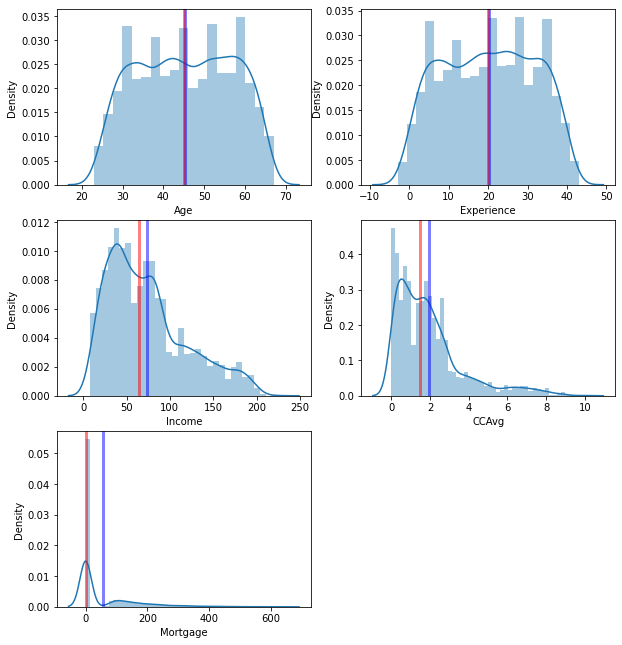

In [11]:
#Define a function to plot the distribution of the continuous data with mean and median. 
def Plot_Dis(A):
    sns.distplot(Data[A])
    plt.axvline(x=Data[A].mean(), linewidth=3, color='b', label="mean", alpha=0.5)
    plt.axvline(x=Data[A].median(), linewidth=3, color='r', label="mean", alpha=0.5)

#loop to plot continuous variables 
j=1  # to be used as index for figure location
plt.figure(figsize=(10,11))
for i in ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']:
    plt.subplot(3,2,j)
    Plot_Dis(i)
    j=j+1

In [12]:
Data.describe().T.drop(['count'],  axis=1).drop(['ZIPCode', 'Personal_Loan', 'Securities_Account',
                                                 'CD_Account', 'Online', 'CreditCard', 'Family', 
                                                'Education'], axis=0)

,mean,std,min,25%,50%,75%,max
Age,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


Mortgage is skewed (as can be seen in the distribution) and STD is larger than the Mean.
Mortgage will be axamined in more detail:

In [13]:
print('there are:', Data[Data['Mortgage'] > 0].Mortgage.count(), 'people with a mortgage')
print('there are:', Data[Data['Mortgage'] == 0].Mortgage.count(), 'people without a mortgage')

there are: 1538 people with a mortgage
there are: 3462 people without a mortgage


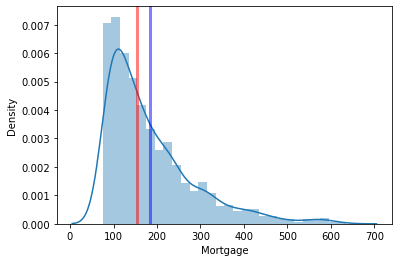

In [14]:
#Plot the distribution of mortages that are non 0. 
temp = Data[Data["Mortgage"] != 0] # Remove rows with no Mortgage
sns.distplot(temp["Mortgage"])
plt.axvline(x=temp.Mortgage.mean(), linewidth=3, color='b', label="mean", alpha=0.5)
plt.axvline(x=temp.Mortgage.median(), linewidth=3, color='r', label="mean", alpha=0.5)

There is a normal distibution with a positive skewness for the people who have a loan. However the majority of people don't have a loan so this variable will be converted to a categorical variable. 

In [15]:
#Convert the Mortgage column to a categorical variable of 1 and 0 to represent people with and without a mortgage. 
def Mortgage(x):
    if x > 0:
        return '1'
    else:
        return '0'

In [16]:
Data['Mortgage'] = Data['Mortgage'].apply(Mortgage)

### 2.2 Categorical Variables

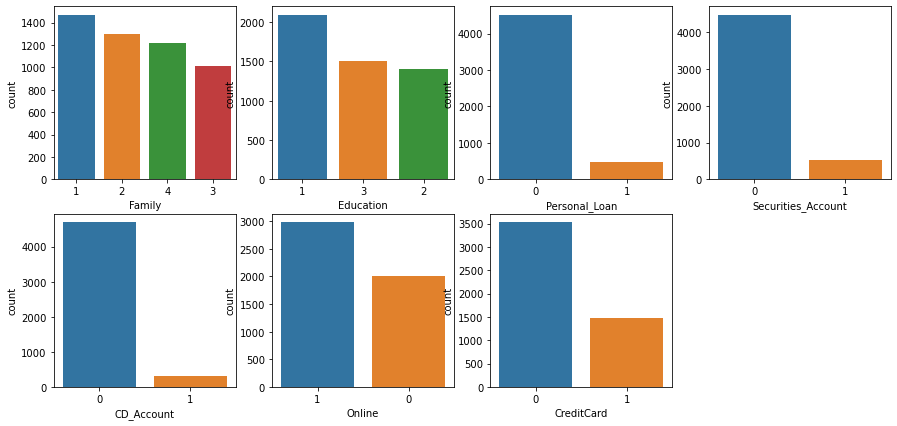

In [17]:
j=1  # to be used as index for figure location
plt.figure(figsize=(15,7))
for i in ['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']:
    plt.subplot(2,4,j)
    sns.countplot(x=i, data=Data, order = Data[i].value_counts().index)
    j=j+1

### 2.3 Zip Code

In [18]:
print('there are:', Data.ZIPCode.nunique(), 'unique zip codes in the data set')

there are: 467 unique zip codes in the data set


In [19]:
#Look at the most frequently zip codes
temp = pd.DataFrame(Data.ZIPCode.value_counts())
temp.head(5)

,ZIPCode
94720,169
94305,127
95616,116
90095,71
93106,57


## 3. EDA 

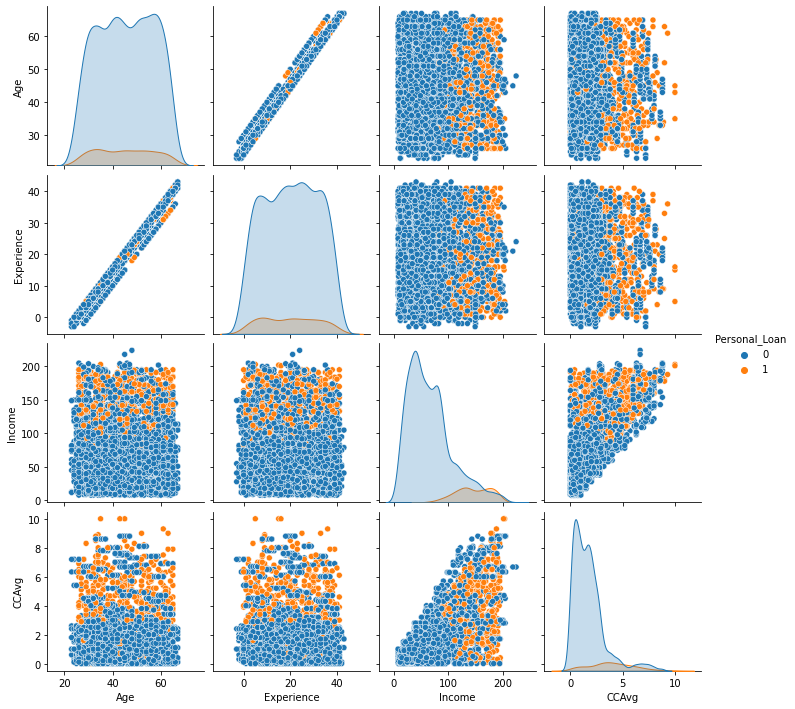

In [20]:
#look at the correlation of the non categorical variables
temp = Data.drop(['ZIPCode', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Family', 'Education'],  axis=1)
#sns.pairplot(temp, kind="reg", hue='Personal_Loan')
sns.pairplot(temp, hue='Personal_Loan')
#plt.show()

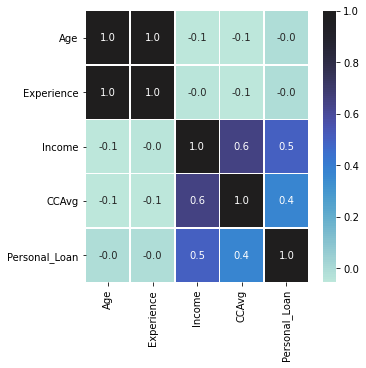

In [21]:
#Correlation plot
plt.figure(figsize=(5,5))
sns.heatmap(temp.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

there is no strong correlation in the continuous variables other than age vs experience and CCaverage vs. Income

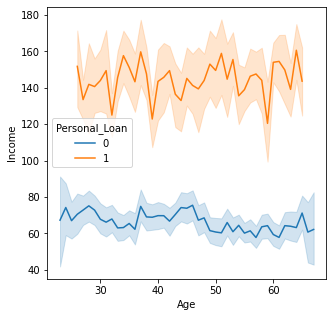

In [22]:
plt.figure(figsize=(5,5))
sns.lineplot(x='Age', y='Income', data=Data, hue='Personal_Loan');

<AxesSubplot:xlabel='Education', ylabel='Income'>

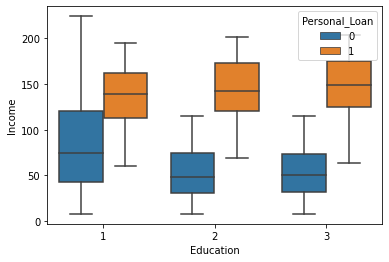

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(y="Income",x="Education",data=Data, hue='Personal_Loan')

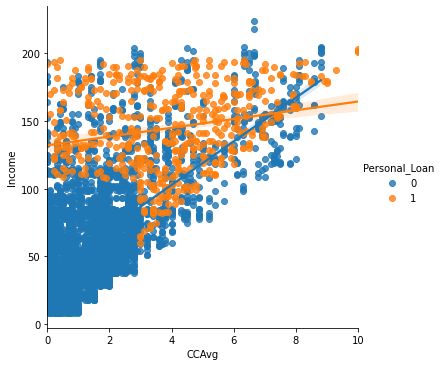

In [24]:
sns.lmplot(x='CCAvg',y='Income',data=Data, hue='Personal_Loan')

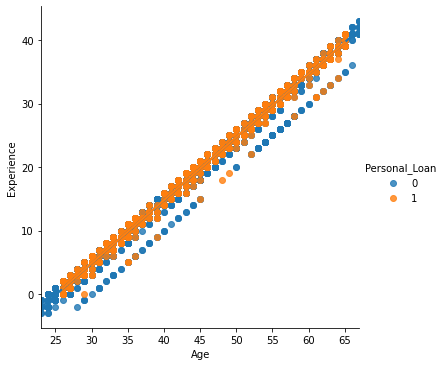

In [25]:
sns.lmplot(y='Experience',x='Age',data=Data, hue='Personal_Loan')

Age and Experience are nearly perfectly correlated. It is unlikeley that Expereince is real data. 

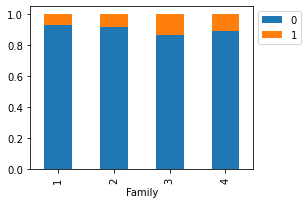

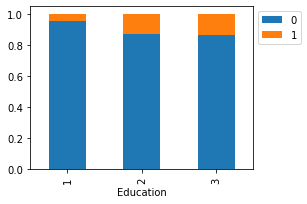

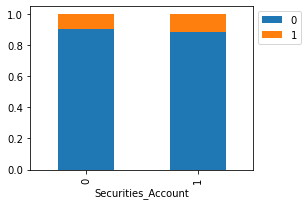

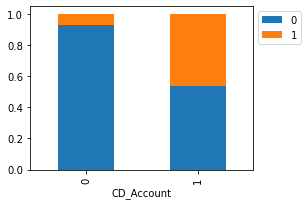

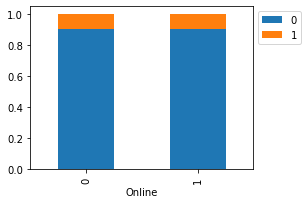

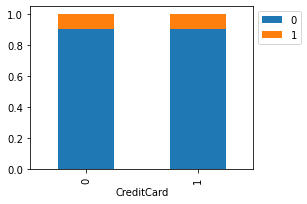

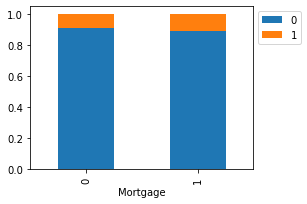

In [26]:
for i in ['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Mortgage']:
    #print(i)
    tab = pd.crosstab(Data[i],Data.Personal_Loan,normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(4,3))
    plt.legend(loc="upper left", bbox_to_anchor=(1,1));

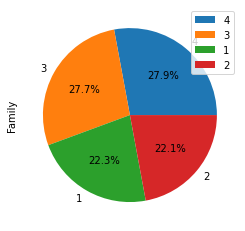

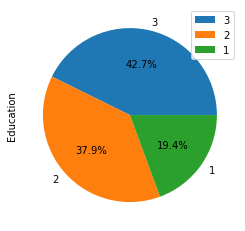

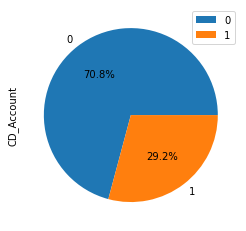

In [27]:
PL = Data[Data['Personal_Loan'] == 1]
for i in ['Family', 'Education', 'CD_Account']:
    temp = pd.DataFrame(PL[i].value_counts())
    plot = temp.plot.pie(y=i, figsize=(4, 4), autopct='%1.1f%%')

## 4. Logistics Regression

### 4.1 Training and Testing Data Set Creation

Zip code will be removed from the data because there are more than 400 unique values, and experience will be removed because it is 100% correlated with age. 

In [28]:
#Remove Zip Code and Experience
Data = Data.drop(['ZIPCode', 'Experience'],  axis=1)

In [29]:
#Convert categorical variables from integer to categorical variable
for i in ['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Mortgage']:
    Data[i] = Data[i].astype('category')

In [30]:
## Defining X and Y variables
X = Data.drop(['Personal_Loan'], axis=1)
Y = Data[['Personal_Loan']]

#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

print(X_train.shape)
print(y_train.shape)

(3500, 13)
(3500, 1)


### 4.2 Logistic Regression Using sklearn

In [31]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

logreg.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.5s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

In [32]:
#Predict for train set
pred_train = logreg.predict(X_train)

In [33]:
# A modified version of the confusion matrix example from class lecture materials. 
def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_actual,y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['Loan','No Loan']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (5,4))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

confusion matrix = 



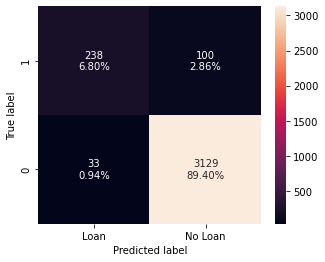

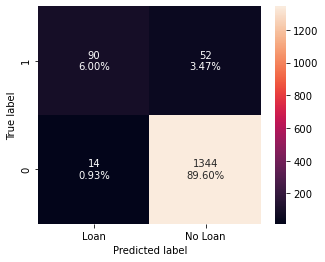

In [34]:
#confusion matrix on train set
make_confusion_matrix(y_train,pred_train)

#Predict for test set
pred_test = logreg.predict(X_test)
print("confusion matrix = \n")
make_confusion_matrix(y_test,pred_test)

In [35]:
#Accuracy with a threhold of 0.5
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))

Accuracy on train data: 0.962
Accuracy on test data: 0.956


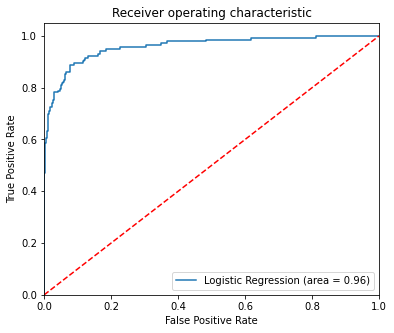

In [36]:
#AUC ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [37]:
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.1297185240018283


In [38]:
y_pred_tr = (logreg.predict_proba(X_train)[:,1]>optimal_threshold).astype(int)
y_pred_ts = (logreg.predict_proba(X_test)[:,1]>optimal_threshold).astype(int)

In [39]:
#Accuracy with optimal threhold
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(y_train, y_pred_tr) )
print('Accuracy on test data:',accuracy_score(y_test, y_pred_ts))

Accuracy on train data: 0.9237142857142857
Accuracy on test data: 0.918


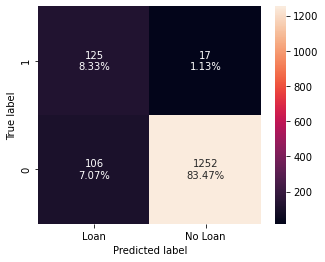

In [40]:
make_confusion_matrix(y_test,y_pred_ts)

### 4.3 Logistics Regression from statsmodels

In [41]:
logit = sm.Logit(y_train, X_train)
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.196497
         Iterations 8


In [42]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           12
Date:                Fri, 07 May 2021   Pseudo R-squ.:                  0.3811
Time:                        10:43:22   Log-Likelihood:                -687.74
converged:                       True   LL-Null:                       -1111.2
Covariance Type:            nonrobust   LLR p-value:                1.435e-173
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Age                     -0.1149      0.006    -20.052      0.000      -0.126      -0.104
Income                   0.0302      0.002     14.896      0.000       0.026       0.034
CCAvg       

In [43]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [44]:
# FIlter by significant p-value (pval <0.005) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=.005
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
CD_Account_1,4.69,109.35,0.99,0.00
Education_3,1.45,4.26,0.81,0.00
Education_2,1.45,4.24,0.81,0.00
Income,0.03,1.03,0.51,0.00
Age,-0.11,0.89,0.47,0.00
Online_1,-1.24,0.29,0.22,0.00
Family_2,-1.36,0.26,0.20,0.00
Securities_Account_1,-1.55,0.21,0.17,0.00
CreditCard_1,-1.88,0.15,0.13,0.00


In [45]:
pred_train = lg.predict(X_train)
pred_train = np.round(pred_train)

pred_ts = lg.predict(X_test)#predict(X_train)
pred_ts = np.round(pred_ts)

#Accuracy with a threhold of 0.5
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_ts))

Accuracy on train data: 0.9297142857142857
Accuracy on test data: 0.9213333333333333


## 5. Decision Tree

build decision tree model with X-Train and y_train created in the previous section

### 5.1 Initial (unrestrained) decision tree

In [46]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

score of the decision tree

In [47]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.98


In [48]:
##  Function to calculate recall score from class example
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [49]:
## Function to create confusion matrix from class example
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (6,5))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [50]:
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.9084507042253521


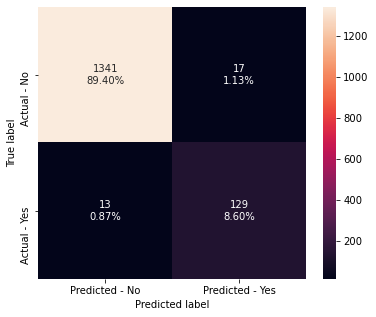

In [51]:
make_confusion_matrix(dTree,y_test)

['Age', 'Income', 'CCAvg', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'Mortgage_1', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1']


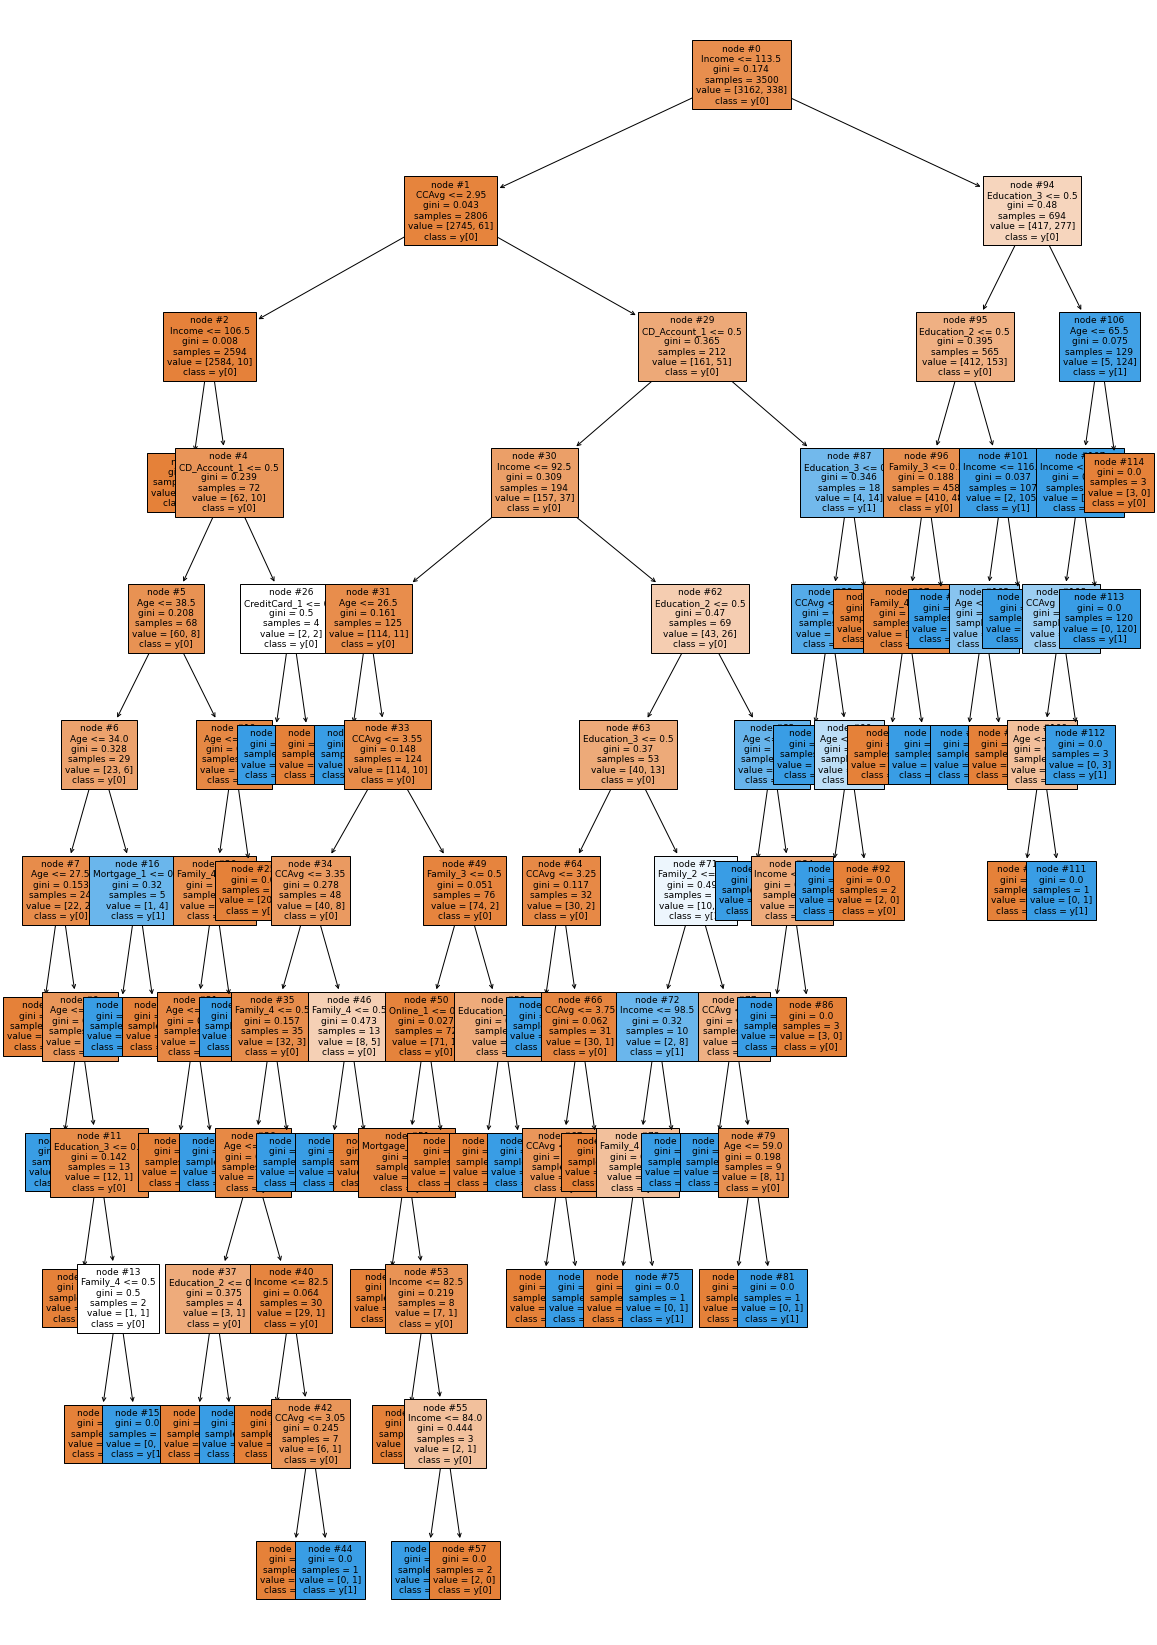

In [52]:
feature_names = list(X.columns)
print(feature_names)

plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [53]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                      Imp
Income               0.29
Education_2          0.24
Education_3          0.18
Family_3             0.08
Family_4             0.08
CCAvg                0.06
Age                  0.05
CD_Account_1         0.02
Family_2             0.00
CreditCard_1         0.00
Mortgage_1           0.00
Online_1             0.00
Securities_Account_1 0.00


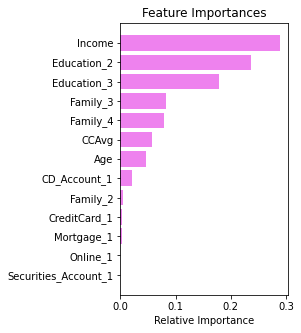

In [54]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(3,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 5.2 Decission tree depth restriction

In [55]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

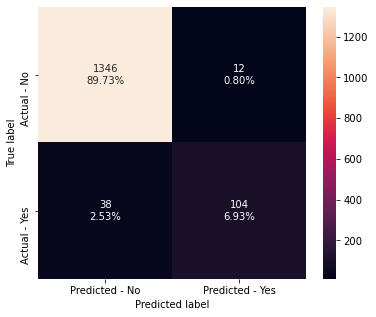

In [56]:
make_confusion_matrix(dTree1, y_test)

In [57]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9705714285714285
Accuracy on test set :  0.9666666666666667
Recall on training set :  0.7189349112426036
Recall on test set :  0.7323943661971831


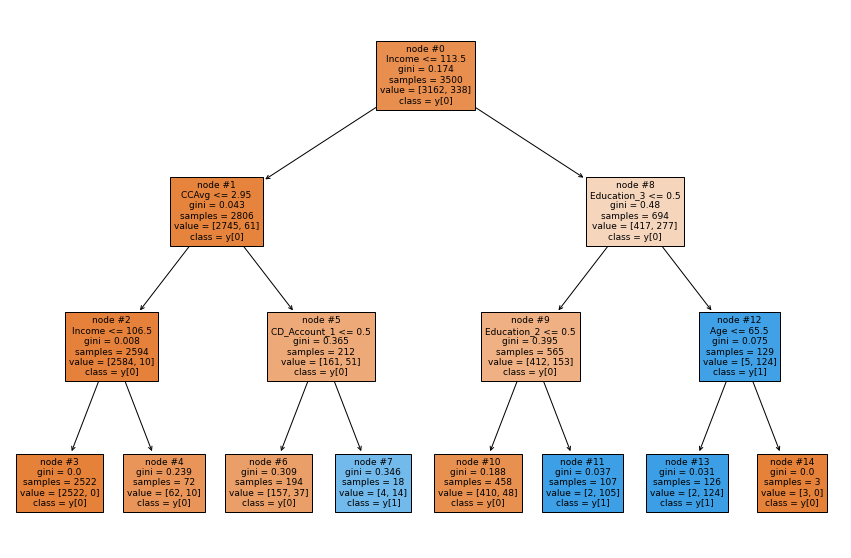

In [58]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [59]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                      Imp
Income               0.37
Education_2          0.31
Education_3          0.23
CCAvg                0.05
CD_Account_1         0.03
Age                  0.01
Family_2             0.00
Family_3             0.00
Family_4             0.00
Mortgage_1           0.00
Securities_Account_1 0.00
Online_1             0.00
CreditCard_1         0.00


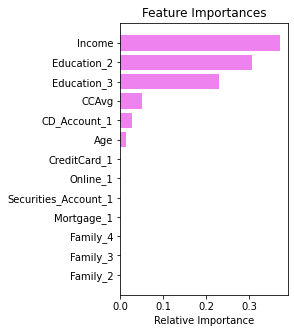

In [60]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(3,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 5.3 Grid Search

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

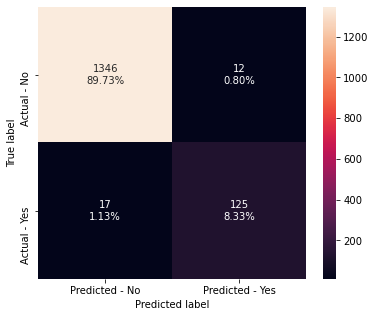

In [63]:
make_confusion_matrix(estimator,y_test)

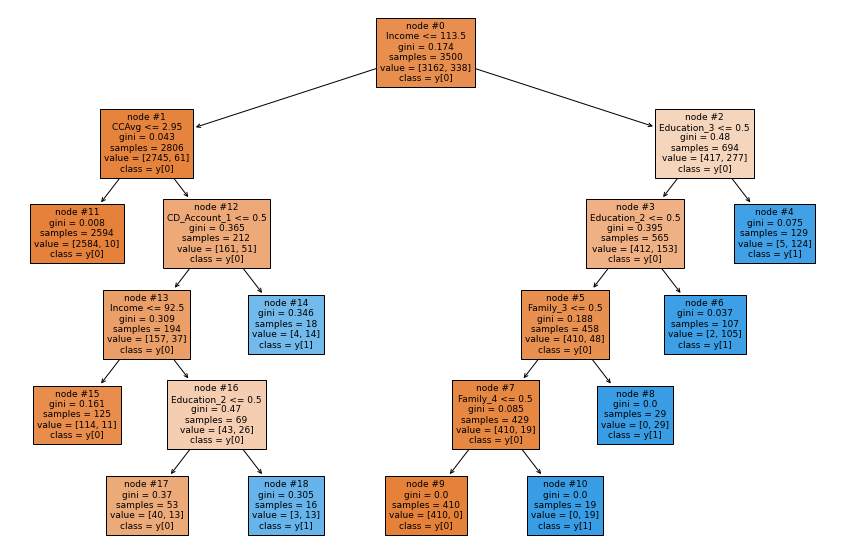

In [64]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [65]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                      Imp
Income               0.32
Education_2          0.27
Education_3          0.19
Family_3             0.09
Family_4             0.07
CCAvg                0.04
CD_Account_1         0.02
Age                  0.00
Family_2             0.00
Mortgage_1           0.00
Securities_Account_1 0.00
Online_1             0.00
CreditCard_1         0.00


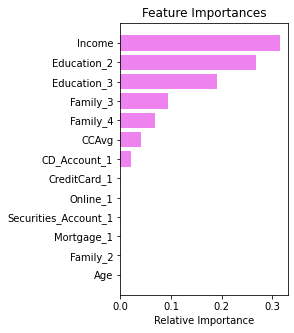

In [66]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(3,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [67]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.9862857142857143
Accuracy on test set :  0.9806666666666667
Recall on training set :  0.8994082840236687
Recall on test set :  0.8802816901408451
